In [288]:
#!pip install matplotlib-venn
import numpy as np
import pandas as pd
import zipfile
from collections import defaultdict
from matplotlib import pyplot as plt
%matplotlib inline

Cargamos los datos y mostramos su contenido

In [289]:
zf = zipfile.ZipFile('data/stack-overflow-developer-survey-2021.zip') 
devs = pd.read_csv(zf.open('survey_results_public.csv'))
comps =pd.read_csv('compensations/2021.csv')

In [290]:
list(devs)

['ResponseId',
 'MainBranch',
 'Employment',
 'Country',
 'US_State',
 'UK_Country',
 'EdLevel',
 'Age1stCode',
 'LearnCode',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'Currency',
 'CompTotal',
 'CompFreq',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'OpSys',
 'NEWStuck',
 'NEWSOSites',
 'SOVisitFreq',
 'SOAccount',
 'SOPartFreq',
 'SOComm',
 'NEWOtherComms',
 'Age',
 'Gender',
 'Trans',
 'Sexuality',
 'Ethnicity',
 'Accessibility',
 'MentalHealth',
 'SurveyLength',
 'SurveyEase',
 'ConvertedCompYearly']

Eliminamos los nulos de las dos  propiedades que nos intersan

In [291]:
devs['LanguageHaveWorkedWith'] = devs['LanguageHaveWorkedWith'].fillna("")
devs['LanguageWantToWorkWith'] = devs['LanguageWantToWorkWith'].fillna("")

In [292]:
pd.set_option('display.max_columns', None)
devs

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,NaN,N

In [293]:
len(devs.index)
lang_worked = devs['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
lang_want = devs['LanguageWantToWorkWith'].str.get_dummies(sep=';')
devs = pd.concat([devs, devs['LanguageHaveWorkedWith'].str.get_dummies(sep=';').add_prefix("LangWorked_"), devs['LanguageWantToWorkWith'].str.get_dummies(sep=';').add_prefix("LangWant_")], axis=1)


In [282]:
# Multiply each lang worked by the compensation so it can be aggregated later
# Filter for rows that pays in dolars

temp = usa_devs.filter(regex='^LangWorked_',axis=1).multiply(usa_devs['CompTotalAdjusted'], axis="index")
usa_devs.filter(regex='^LangWorked_',axis=1).sum() / len(usa_devs)
#usa_devs.count()


LangWorked_APL            0.007326
LangWorked_Assembly       0.059916
LangWorked_Bash/Shell     0.376570
LangWorked_C              0.187729
LangWorked_C#             0.294152
LangWorked_C++            0.225209
LangWorked_COBOL          0.005364
LangWorked_Clojure        0.031201
LangWorked_Crystal        0.008830
LangWorked_Dart           0.027407
LangWorked_Delphi         0.009942
LangWorked_Elixir         0.026099
LangWorked_Erlang         0.010531
LangWorked_F#             0.012886
LangWorked_Go             0.124150
LangWorked_Groovy         0.037088
LangWorked_HTML/CSS       0.555468
LangWorked_Haskell        0.024071
LangWorked_Java           0.306646
LangWorked_JavaScript     0.653257
LangWorked_Julia          0.018446
LangWorked_Kotlin         0.064233
LangWorked_LISP           0.022567
LangWorked_Matlab         0.037350
LangWorked_Node.js        0.348051
LangWorked_Objective-C    0.031332
LangWorked_PHP            0.140764
LangWorked_Perl           0.039377
LangWorked_PowerShel

In [285]:
Clojure
$95,000
F#
$81,037
Elixir
$80,077
Erlang
$80,077
Perl
$80,000
Ruby
$80,000
Scala
$77,832
Rust
$77,530
Go
$75,669
LISP
$75,669
APL
$75,631
Groovy
$75,002
Crystal
$72,400
Bash/Shell
$71,340
PowerShell
$68,824
Haskell
$67,021
Julia
$65,228
Objective-C
$64,859
Python
$59,454
R
$59,454
TypeScript
$59,172
Swift
$58,910
C#
$58,368
SQL
$56,228
Assembly
$55,211
Kotlin
$55,071
Node.js
$54,672
C++
$54,049
JavaScript
$54,049
VBA
$53,825
C
$53,184
HTML/CSS
$52,980
COBOL
$52,340
Java
$51,888
Delphi
$46,704
Matlab
$43,948
PHP
$38,916
Dart
$32,986

LangWorked_APL            5.228194e+05
LangWorked_Assembly       4.668821e+05
LangWorked_Bash/Shell     1.331285e+23
LangWorked_C              3.473660e+05
LangWorked_C#             3.028388e+05
LangWorked_C++            6.806580e+26
LangWorked_COBOL          7.100623e+06
LangWorked_Clojure        4.287111e+05
LangWorked_Crystal        2.769713e+05
LangWorked_Dart           2.462636e+05
LangWorked_Delphi         2.531967e+05
LangWorked_Elixir         3.788693e+05
LangWorked_Erlang         7.265420e+05
LangWorked_F#             5.669156e+05
LangWorked_Go             9.056604e+26
LangWorked_Groovy         3.026197e+05
LangWorked_HTML/CSS       3.327940e+05
LangWorked_Haskell        5.056250e+05
LangWorked_Java           3.255710e+05
LangWorked_JavaScript     3.172031e+05
LangWorked_Julia          6.267531e+05
LangWorked_Kotlin         4.164064e+05
LangWorked_LISP           2.254109e+06
LangWorked_Matlab         3.335766e+05
LangWorked_Node.js        3.036628e+05
LangWorked_Objective-C   

In [248]:
pivoted = temp.melt(var_name="lang", value_name="Compensation")

In [230]:
pivoted["Compensation"] = pivoted["Compensation"].replace({0:np.nan})

In [231]:
pivoted.groupby("lang").median()

,Compensation
lang,
LangWorked_APL,142500.0
LangWorked_Assembly,120000.0
LangWorked_Bash/Shell,125000.0
LangWorked_C,120000.0
LangWorked_C#,110000.0
LangWorked_C++,120000.0
LangWorked_COBOL,122500.0
LangWorked_Clojure,153000.0
LangWorked_Crystal,125000.0


In [53]:
pivoted[(pivoted["lang"] == "LangWorked_Python") & (pivoted["Compensation"].notnull())].median()

Compensation    71500.0
dtype: float64

In [35]:
pivoted.groupby("lang").sum()

,Compensation
lang,
LangWorked_APL,4.162088e+15
LangWorked_Assembly,4.162087e+15
LangWorked_Bash/Shell,1.000000e+74
LangWorked_C,4.162114e+15
LangWorked_C#,4.162131e+15
LangWorked_C++,1.000000e+29
LangWorked_COBOL,4.162084e+15
LangWorked_Clojure,4.162082e+15
LangWorked_Crystal,5.528168e+10


Contamos las apariciones cada lenguaje en cada uno de los apartados.
Calculamos el porcentaje con respecto al total.

In [12]:

def per_by_lan(df, column):
    n = len(df.index)
    c = defaultdict(int)
    for r in df[column]:
        lans = r.split(';')               
        for lan in lans:
            c[lan] = c[lan] + 1
    p = dict()
    for k, v in c.items():
        p[k] = v / n
    return p

In [17]:
a = per_by_lan(devs, 'LanguageHaveWorkedWith')

print(a)



{'C++': 0.24037919917544553, 'HTML/CSS': 0.554405014441688, 'JavaScript': 0.6422296528002492, 'Objective-C': 0.02768489555243951, 'PHP': 0.21728448327520702, 'Swift': 0.05038411294478601, 'Python': 0.4768992916981268, 'Assembly': 0.055513608744112465, 'C': 0.2076846558563741, 'R': 0.05015640168266638, 'Rust': 0.06949987415956567, 'TypeScript': 0.29852946463883795, 'Bash/Shell': 0.2682798211867352, 'SQL': 0.465429834969259, 'C#': 0.27545871834513835, 'Java': 0.3495008329438272, 'Node.js': 0.33527487146298496, 'PowerShell': 0.10631718980332938, 'Ruby': 0.06674336940759118, 'Perl': 0.024305181030453385, 'Matlab': 0.04609355337432136, 'Kotlin': 0.08228765924807345, 'Julia': 0.012799769891777226, 'Haskell': 0.020961420918275627, 'Delphi': 0.020745694459425448, 'Go': 0.09442826496003068, 'Scala': 0.025743357422787903, 'Dart': 0.05950454823284076, '': 0.012967557137549587, 'VBA': 0.04610553817759081, 'Groovy': 0.029710327304977288, 'Clojure': 0.018600414674193124, 'APL': 0.006423854552427522,

In [18]:
b = per_by_lan(devs, 'LanguageWantToWorkWith')
print(b)

{'Swift': 0.07613945517084338, '': 0.07931542803724877, 'Julia': 0.02930284399381584, 'Python': 0.41861719339877035, 'Rust': 0.190138903869893, 'JavaScript': 0.4435335993959659, 'TypeScript': 0.3224511319646688, 'Bash/Shell': 0.1683025923129472, 'HTML/CSS': 0.351789930368293, 'SQL': 0.3191672958688383, 'C#': 0.21571447404690852, 'C++': 0.1827562650559091, 'Go': 0.189216074018145, 'Java': 0.2064022819065425, 'Node.js': 0.2888337587938494, 'Objective-C': 0.016778724577236066, 'Perl': 0.01408214384160884, 'PHP': 0.10608947854120974, 'Ruby': 0.059228897757643305, 'Haskell': 0.041383525689425806, 'Clojure': 0.0289193302891933, 'C': 0.11627656132024593, 'APL': 0.00680736825705006, 'Kotlin': 0.12812953175373626, 'R': 0.048118985126859144, 'F#': 0.025851220652212993, 'Scala': 0.03793190234782296, 'Assembly': 0.0428816260981076, 'Dart': 0.0841093493450305, 'Elixir': 0.04043672623113891, 'PowerShell': 0.05867759680724841, 'VBA': 0.012811754695046682, 'Matlab': 0.018720262706887668, 'LISP': 0.018

In [ ]:
languaje,"color", año,  LanguageHaveWorkedWith, LanguageWantToWorkWith, income

Seleccionamos solo las filas que tengan alguno de los lenguajes de programacion:

In [8]:
# obtain just rows with at least one of the common used programming languajes
common_used = devs['LanguageHaveWorkedWith'].where(lambda x : x.str.contains('|'.join(common))).dropna()
venn = defaultdict(int)
for r in common_used:
    group = []
    for l in common:
        if l in r:
            group.append(l)
    k = '_'.join(group)
    venn[k] = venn[k] + 1
print(venn)

defaultdict(<class 'int'>, {'JavaScript_HTML/CSS': 21458, 'JavaScript_Python': 5614, 'Python': 11817, 'JavaScript': 7155, 'HTML/CSS_Python': 3001, 'JavaScript_HTML/CSS_Python': 19360, 'HTML/CSS': 2440})


Construimos el conjunto de datos necesario para crear el diagrama de Venn

In [9]:
# Build the venn set to feed the venn3
venn_set = []
venn_set.append(venn[common[0]])
venn_set.append(venn[common[1]])
k = '_'.join([common[0], common[1]])
venn_set.append(venn[k])
venn_set.append(venn[common[2]])
k = '_'.join([common[0], common[2]])
venn_set.append(venn[k])
k = '_'.join([common[1], common[2]])
venn_set.append(venn[k])
k = '_'.join(common)
venn_set.append(venn[k])

venn_set

[7155, 2440, 21458, 11817, 5614, 3001, 19360]

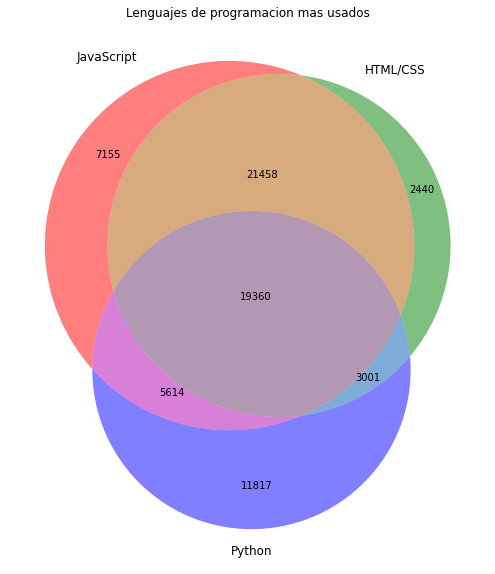

In [11]:
plt.figure(figsize=(10,10))
plt.title("Lenguajes de programacion mas usados")
venn3(subsets = venn_set, set_labels = common, alpha = 0.5)
plt.savefig("venn.svg")
